In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from reproject import reproject_interp
from matplotlib.colors import ListedColormap, BoundaryNorm
from astropy import units as u
from astropy.coordinates import SkyCoord


### Import hi4pi & ST datasets in Tadpole cutout dimensions

In [2]:
from spectral_cube import SpectralCube
cube_hi4pi = SpectralCube.read('/srv/data/hi4pi/CAR.fits')
subcube_hi4pi = cube_hi4pi.subcube(xlo = 125.40277314*u.deg, xhi = 149.36154399*u.deg,ylo = -5.11325698*u.deg, yhi = 19.10687347*u.deg)

wcs_sub=subcube_hi4pi.wcs

In [3]:
fn = '/srv/data/st/fr/mosaic/tadpole_hinew.fits'

header_st_gal = fits.getheader(fn)
wcs_st_gal = WCS(header_st_gal)
st_gal = fits.getdata(fn)
st_gal.shape

(1, 256, 4096, 4096)

In [4]:
cube_st = SpectralCube.read('/srv/data/st/fr/mosaic/tadpole_hinew_noStokeshdr.fits')
subcube_st = cube_st.subcube(xlo = 125.40277314*u.deg, xhi = 149.36154399*u.deg,ylo = -5.11325698*u.deg, yhi = 19.10687347*u.deg)

wcs_st=subcube_st.wcs

#-- wcs_st is an expanded WCS of the ST data set, allowing us to get both HI4PI and ST data projected onto one WCS for combining

In [6]:
cube3_st = SpectralCube.read('/srv/data/st/fr/mosaic/tadpole_hi_4spectralcube_again2.fits')

#-- wcs_st is an expanded WCS of the ST data set, allowing us to get both HI4PI and ST data projected onto one WCS for combining

### Reproject Datasets to common WCS

In [7]:
st_reproject, footprint = reproject_interp((cube_st.unmasked_data[70],cube_st.wcs.celestial),wcs_st.celestial, (4312,4312))
#st3_reproject, footprint = reproject_interp((cube3_st.unmasked_data[70],cube3_st.wcs.celestial),wcs_st.celestial, (4312,4312))

In [8]:
hi4pi_reproject, footprint = reproject_interp((subcube_hi4pi.unmasked_data[463],wcs_sub.celestial), wcs_st.celestial, (4312,4312))

### Check that the reprojected data makes sense

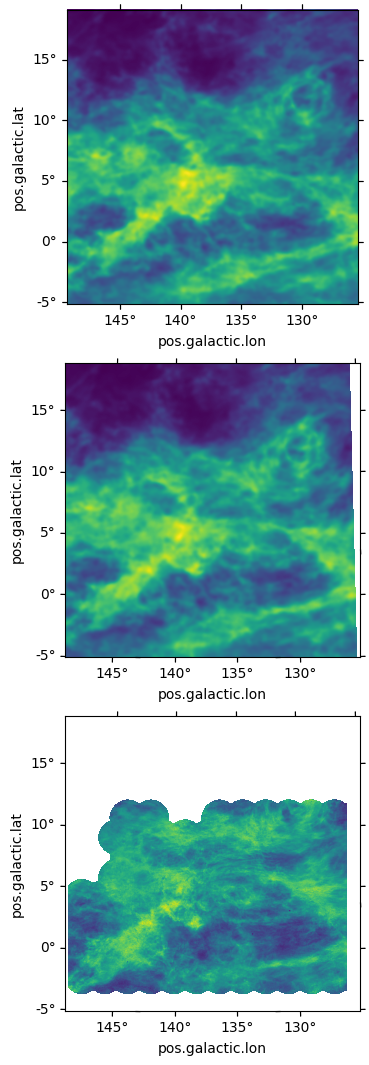

In [9]:
fig = plt.figure(figsize=(10,13))
ax = fig.add_subplot(311, projection=wcs_sub.celestial)
im = ax.imshow(subcube_hi4pi.unmasked_data[464], cmap='viridis')

ax = fig.add_subplot(312, projection=wcs_st.celestial)
im = ax.imshow(hi4pi_reproject, cmap='viridis')

ax = fig.add_subplot(313, projection=wcs_st.celestial)
im = ax.imshow(st_reproject, vmin=0, vmax=100)

### Bring in the Tadpole contour

In [10]:
# eq = Equitorial Co-ordinates 
fn = '/srv/data/chime/chime_QU_Sep2023/Q_600_800_Sept2023_new_gal_fix.fits'
header_chime_eq = fits.getheader(fn)
wcs_chime_eq = WCS(header_chime_eq)
chimeStokesQ_eq = fits.getdata(fn)
fn = '/srv/data/chime/chime_QU_Sep2023/Q_600_800_Sept2023_new_gal_fix.fits'
chimeStokesU_eq = fits.getdata(fn)

countour_stokes_U, footprint = reproject_interp((chimeStokesU_eq[475],wcs_chime_eq.celestial), wcs_st.celestial, (2163, 4323))

In [11]:
xpix_gal, ypix_gal = wcs_st.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal


xhead_h4,         yhead_h4 = wcs_st.celestial.wcs_world2pix(137.1,7.1, 1)
xhead_h4 =    int(xhead_h4)
yhead_h4 =    int(yhead_h4)


xtail_h4,         ytail_h4 = wcs_st.celestial.wcs_world2pix(134,6.6, 1)
xtail_h4 =    int(xtail_h4)
ytail_h4 =    int(ytail_h4)

xoff_h4,           yoff_h4 = wcs_st.celestial.wcs_world2pix(135,9.5, 1)
xoff_h4 =      int(xoff_h4)
yoff_h4 =      int(yoff_h4)


In [12]:
# eq = Equitorial Co-ordinates
hdu_chimeStokesQ_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/Q_600_800_Nov252022_fix_gal.fits')
hdu_chimeStokesU_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/U_600_800_Nov252022_fix_gal.fits')
header_chime_eq = hdu_chimeStokesU_eq[0].header
wcs_chime_eq = WCS(header_chime_eq)
chimeStokesQ_eq = hdu_chimeStokesQ_eq[0].data
chimeStokesU_eq = hdu_chimeStokesU_eq[0].data
print(chimeStokesQ_eq.shape)

countour_pol_angle= 0.5*np.arctan2(chimeStokesU_eq[474] , chimeStokesQ_eq[475] )# calculating polarization angle
#extremely ineffecient way to create desired contour
countour_pol_angle[400:] = np.nan
countour_pol_angle[:380] = np.nan
countour_pol_angle[:, 210:] = np.nan
countour_pol_angle[:384,203:] = np.nan
countour_pol_angle[390:,205:] = np.nan
countour_pol_angle[385:392, 168:175] = np.nan
countour_pol_angle[385:390, 167:175] = np.nan

countour_pol_angled, footprint = reproject_interp((countour_pol_angle,wcs_chime_eq.celestial), wcs_st.celestial, (4096, 4096))

(512, 720, 1440)


In [13]:
xpix_gal, ypix_gal = wcs_st.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal

s=180
ymin=ypix_gal-s; ymax=ypix_gal+s; xmin=xpix_gal-s; xmax=xpix_gal+s;

### Combine the datasets

In [14]:
st_copy = st_reproject.copy()
st_copy2 = st_reproject.copy()

st_copy[np.where(np.isnan(st_copy2))] = hi4pi_reproject[np.where(np.isnan(st_copy2))]


### Plot

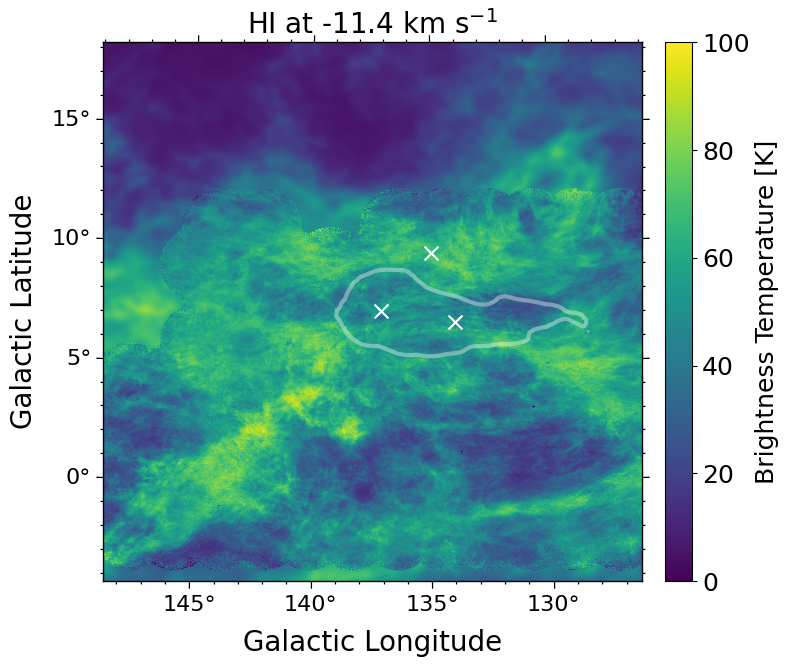

In [15]:
fig=plt.figure(figsize=(15,7))


ax = fig.add_subplot((111), projection=wcs_st.celestial, slices=('x', 'y'))
im = ax.imshow(st_copy, cmap='viridis', vmin=0, vmax=100)

ax.scatter(xhead_h4,  yhead_h4, c='white', s=100, marker='x', zorder=10)
ax.scatter(xtail_h4,  ytail_h4, c='white', s=100, marker='x', zorder=10)
ax.scatter(xoff_h4 ,   yoff_h4,   c='white', s=100, marker='x', zorder=10)

levels = [-np.pi/8]  # Define contour levels to use
ax.contour(countour_pol_angled, cmap='Greens', alpha=0.4, levels=levels, zorder=40, linewidths=3)#, linestyles='-.')     # creating contour


ax.set_ylabel("Galactic Latitude", fontsize=20)
ax.set_xlabel("Galactic Longitude", fontsize=20)

#ax.axvline(650)
#ax.axvline(2100)
#
#ax.axhline(3020)
#ax.axhline(1800)

ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(1)
s=1850
ax.set_ylim(ymin-s, ymax+s)
ax.set_xlim(xmin-s, xmax+s)
#v_rad = wcs_st_gal.wcs_pix2world(1,1,69, 1, 1)[2]
ax.set_title(r'HI at -11.4 km s$^{-1}$', fontsize=20)

#ax.axvline(3100)
#ax.axhline(2200)


cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Brightness Temperature [K]', fontsize=18)
plt.savefig('/srv/nmohamme/notebooks/Fall2023/Paper_update/figures/fig10.pdf', bbox_inches='tight', pad_inches=0.1)

Baseline subtraction

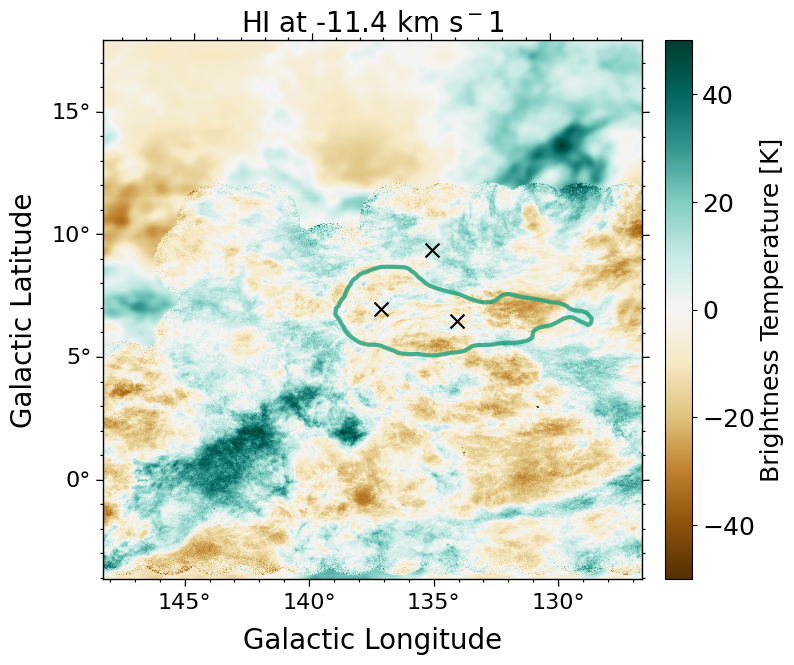

In [74]:
k=70
hi4pi_gal_subtracted = st_copy.copy()
mean_list=[]
for i in np.arange(0, 4312):
    hi4pi_gal_subtracted[i] = st_copy[i]-np.nanmean(st_copy[i,22:3806])
    mean_list.append(np.nanmean(st_copy[i,22:3806]))

fig=plt.figure(figsize=(15,7))


ax = fig.add_subplot((111), projection=wcs_st.celestial, slices=('x', 'y'))
im = ax.imshow(hi4pi_gal_subtracted, cmap='BrBG', vmin=-50, vmax=50)

ax.scatter(xhead_h4,  yhead_h4, c='black', s=100, marker='x', zorder=10)
ax.scatter(xtail_h4,  ytail_h4, c='black', s=100, marker='x', zorder=10)
ax.scatter(xoff_h4 ,   yoff_h4, c='black', s=100, marker='x', zorder=10)

levels = [-np.pi/8]  # Define contour levels to use
ax.contour(countour_pol_angled, cmap='Dark2', alpha=0.8, levels=levels, zorder=40, linewidths=3)#, linestyles='-.')     # creating contour


ax.set_ylabel("Galactic Latitude", fontsize=20)
ax.set_xlabel("Galactic Longitude", fontsize=20)

#ax.axvline(1450)
#ax.axvline(2100)
#
#ax.axhline(3020)
#ax.axhline(2760)

ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(1)
s=1800
ax.set_ylim(ymin-s, ymax+s)
ax.set_xlim(xmin-s, xmax+s)
#v_rad = wcs_st_gal.wcs_pix2world(1,1,69, 1, 1)[2]
ax.set_title(rf'HI at -11.4 km s$^{-1}$', fontsize=20)


cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Brightness Temperature [K]', fontsize=18)
#plt.savefig('/home/nmohamme/Fall2023/Paper_update/figures/N_HI.png', bbox_inches='tight', pad_inches=0.1)